# Introduction

I will be scraping homes.com site for rentals as I am interested in seeing how much the rental is costing now in the Nothern VA area. Northern Virginia is a suburban area outside of DC, so it is a good location especially for those who are working in Washington, DC. This area is crowded as there are lots of jobs here. Specially, I am looking for rentals in Fairfax County, Arlington County, and Washington DC. The search is restricted to townhouses and houses which have 2 or more bedrooms as I am more interested to see what the average rental price for the location given the rocket rising rental market.

I am going to scrape homes.com using Beautiful Soup to extract posts of title, price, address, the number of bedrooms, the number of bathrooms for the data analysis.

# Questions

I like to start off with questions for my project: 

- How much is the price range for 2-3 bedroom townhomes or family house
in Arlington County? Fairfax County? or DC?
- Is there a correlation between price vs the number of bathrooms? Location? or the number bedrooms?

# Webscraping

As a good practice for webscraping, firstly I was checking robots.txt file of homes.com site and see that I should 
be able to scrape the site as long as I leave out the following domains: /services/ and /routes as below:




Below is the result of homes.com/robots.txt: we are allowed to scrape as long as not following paths like /services/ or /routes/  

User-agent: *  
User-agent: AdsBot-Google  
User-agent: AdsBot-Google-Mobile  
Disallow: /services/  
Disallow: /routes/  

User-agent: GPTBot  
Disallow: /  

Sitemap: https://www.homes.com/sitemap-cities-for-sale-index.xml.gz  
Sitemap: https://www.homes.com/sitemap-cities-for-rent-index.xml.gz  
Sitemap: https://www.homes.com/sitemap-cities-openhouse-index.xml.gz  
Sitemap: https://www.homes.com/sitemap-counties-for-sale-index.xml.gz  
Sitemap: https://www.homes.com/sitemap-counties-for-rent-index.xml.gz  
Sitemap: https://www.homes.com/sitemap-zipcodes-for-sale-index.xml.gz  
Sitemap: https://www.homes.com/sitemap-zipcodes-for-rent-index.xml.gz  
Sitemap: https://www.homes.com/sitemap-neighborhoods-index.xml.gz  
Sitemap: https://www.homes.com/sitemap-neighborhoods-for-sale-index.xml.gz  
Sitemap: https://www.homes.com/sitemap-neighborhoods-for-rent-index.xml.gz  
Sitemap: https://www.homes.com/sitemap-agent-detail-index.xml.gz  
Sitemap: https://www.homes.com/sitemap-agent-directory-cities-index.xml.gz  
Sitemap: https://www.homes.com/sitemap-agent-directory-neighborhoods-index.xml.gz  
Sitemap: https://www.homes.com/sitemap-properties-active-index.xml.gz  
Sitemap: https://www.homes.com/sitemap-zipcodes-sold-index.xml.gz  
Sitemap: https://www.homes.com/sitemap-cities-sold-index.xml.gz  
Sitemap: https://www.homes.com/sitemap-schools-index.xml.gz  

# Imports

In [16]:
#!pip install plotly

In [17]:
#!pip install requests

In [18]:
#!pip install bs4

In [19]:
#!pip install pandas

In [2]:
#!pip install matplotlib

In [20]:
#!pip install seaborn

In [21]:
# keep all the required installed packages in requirements.txt
#!pip freeze > requirements.txt

In [3]:
# Importing necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
from time import sleep
import itertools
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import re
import warnings
import numpy as np
import random
import plotly.express as px


I would tryout with one post to make sure the codes to extract price, address, bedroom, bathroom, and title are working as expected.
Trying out with the first post:
* I used requests and BeautifulSoup to download the content of the website
* Inspected the html structure and extracted the posts' details

In [14]:
# use a header to get the content 
Headers = ({'User-Agent': 
            'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36'})

In [15]:
url = 'https://www.homes.com/fairfax-county-va/homes-for-rent/2-to-5-bedroom/p2/?property_type=1,2&bath-min=1&bath-max=5'
response = requests.get(url, headers=Headers)
first_soup = BeautifulSoup(response.text, "html.parser")

In [16]:
# checking the response status
response.status_code

200

In [17]:
first_soup


<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=5.0" name="viewport">
<meta content="no-referrer-when-downgrade" name="referrer"/>
<meta content="telephone=no" name="format-detection">
<meta content="email=no" name="format-detection">
<meta content="true" name="HandheldFriendly"/>
<link href="/favicon.ico" rel="icon" type="image/x-icon"/>
<link href="/apple-touch-icon.png" rel="apple-touch-icon"/>
<link href="/apple-touch-icon-precomposed.png" rel="apple-touch-icon"/>
<link href="/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<link href="/apple-touch-icon-152x152.png" rel="apple-touch-icon" sizes="152x152"/>
<link href="/apple-touch-icon-152x152-precomposed.png" rel="apple-touch-icon" sizes="152x152"/>
<link href="/apple-touch-icon-120x120.png" rel="apple-touch-icon" sizes="120x120"/>
<link href="/apple-touch-icon-120x120-precompo

In [18]:
# getting all posts on the first page
posts = first_soup.find_all('li', class_= "placard-container")
#Trying out with post two
post_two = posts[1]
post_two
#print(posts)

<li class="placard-container">
<article class="search-placard for-rent-mls-placard" data-lk="vxptyn7jf2bwr" data-pk="trqjeve5q0r67">
<div class="embla">
<div class="embla__viewport">
<div aria-label="Property Image" class="embla__container" role="img">
<div class="embla__slide">
<div class="embla__slide__inner">
<a aria-label="Property Image" href="/property/5119-bradfield-ct-annandale-va/trqjeve5q0r67/" role="img" target="_blank">
<img alt="Property Image" class="embla__slide__img image-container" data-image="https://images.homes.com/listings/115/2836295633-372960951-original.jpg" data-slide="1" src="/assets/images/pulse-loader.3a9b46dabeb77512.gif"/>
</a>
</div>
</div>
<div class="embla__slide">
<div class="embla__slide__inner">
<a aria-label="Property Image" href="/property/5119-bradfield-ct-annandale-va/trqjeve5q0r67/" role="img" target="_blank">
<img alt="Property Image" class="embla__slide__img image-container" data-defer-src="https://images.homes.com/listings/115/0246295633-3729

Post Two

In [19]:
# Find all <li> elements within the <ul> element, we will get price, br, ba
li_elements = post_two.find('ul', class_='detailed-info-container').find_all('li')

# Extract the text from each <li> element
for li in li_elements:
    text = li.get_text()
    #print(type(text))
    print(text)

$3,400 per month
3 Beds
2.5 Baths


In [20]:
# extract addresses
address = post_two.find('p', class_='address').text
print(address)

5119 Bradfield Ct, Annandale, VA 22003


Post One

In [21]:
post_one= posts[0]
# Find all <li> elements within the <ul> element, we will get price, br, ba
li_elements = post_one.find('ul', class_='detailed-info-container').find_all('li')

# Extract the text from each <li> element
for li in li_elements:
    text = li.get_text()
    print(text)

$3,100 per month
3 Beds
3.5 Baths


In [22]:
# Initialize variables
price = None
bedrooms = None
bathrooms = None

# Find all <li> elements within the <ul> element
li_elements = post_one.find('ul', class_='detailed-info-container').find_all('li')

# Process the text from each <li> element
for li in li_elements:
    text = li.get_text()
    
    # Check if the text contains "per month" (indicating it's a price)
    if "per month" in text:
        if "-" in text:
            price = "Na"
        else:
            price = text[:-10]
            price = price.replace('$', '').replace(',', '')

# Now, outside the loop, check for "Beds" and "Baths"
for li in li_elements:
    text = li.get_text()
    
    # Check if the text contains "Beds" (indicating it's the number of bedrooms)
    if "Beds" in text:
        if "-" in text:
            bedrooms = "Na"
        else:
            bedrooms = int(text[:-5])

for li in li_elements:
    text = li.get_text()
    # Check if the text contains "Baths" (indicating it's the number of bathrooms)
    if "Baths" not in text:
        bathrooms = "Na"
    else:    
        bathrooms = float(text[:-6])

# Output the extracted data
print("Price:", price)
print("Bedrooms:", bedrooms)
print("Bathrooms:", bathrooms)


Price: 3100
Bedrooms: 3
Bathrooms: 3.5


In [23]:
# getting address
address = post_one.find('p', class_='address').text
print(address)

8914 Shamrock Ct, Springfield, VA 22152


In [24]:
# Define a regular expression pattern to capture city, state, and zipcode
pattern = r', (.*), (..) (\d{5})$'

# Use re.search() to find the pattern in the address
match = re.search(pattern, address)

# Check if a match is found and extract the city, state, and zipcode
if match:
    city = match.group(1).strip()  # Remove leading/trailing spaces
    state = match.group(2)
    zipcode = match.group(3)
    print("City:", city)
    print("State:", state)
    print("Zipcode:", zipcode)
else:
    print("No Address")


City: Springfield
State: VA
Zipcode: 22152


In [25]:
# getting titles
title = post_two.find('p', class_='property-name').text
print(title)

House for Rent


In [26]:
# extracting just Townhouse or House
pattern = r'(Townhouse|House) for Rent'
match = re.search(pattern, title)
if match:
    house_type = match.group(1)
    print(house_type)

House


Saving the html content

In [27]:
# save all the posts html content
# Convert the BeautifulSoup object back to a string
parsed_html = first_soup.prettify()  # You can use prettify() to make it nicely formatted

# Specify the file path where you want to save the parsed HTML content
file_path = 'parsed_file.html'

# Open the file in write mode and write the parsed HTML content to it
with open(file_path, 'w', encoding='utf-8') as file:
    file.write(parsed_html)

print(f'Parsed HTML content saved to {file_path}')


Parsed HTML content saved to parsed_file.html


In [28]:
# find total posts to use for pagination
total_posts = first_soup.find('span', attrs={'id':'spanSearchCount'}).text #spanSearchCount

In [29]:
total_posts

'518 2-Bedroom Homes for Rent in Fairfax County'

In [30]:
pattern = r'\d+'
match = re.search(pattern, total_posts)
total = match.group(0)
print(total)

518


## Combining all codes

After testing with post_two, I finally combined all the codes and added sleep command not to overload the site with several requests per second, so I would not get blocked.


# Fairfax County VA

In [31]:
#find the total number of pages
total_pages = (first_soup.find('span', class_='pageRange').text)
total_pages = int(total_pages[-2:])
print(total_pages)

21


In [33]:
# Define headers
Headers = ({'User-Agent': 
            'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36'})

# Make a GET request to the initial page to get the total number of pages
response = requests.get("https://www.homes.com/fairfax-county-va/homes-for-rent/2-to-5-bedroom/?property_type=1,2&bath-min=1&bath-max=5", headers=Headers)

if response.status_code == 200:
    first_soup = BeautifulSoup(response.text, 'html.parser')
    # Find the total number of pages
    total_pages = first_soup.find('span', class_='pageRange').text
    total_pages = int(total_pages[-2:])
else:
    print("Failed to retrieve the total number of pages.")
    total_pages = 0

addresses = []
prices = []
bedrooms = []
bathrooms = []
titles = []

# Initiate pages
pages = np.arange(1, total_pages + 1)

i = 0

for page in pages:
    page_str = str(page)
    # Get request
    response = requests.get(f"https://www.homes.com/fairfax-county-va/homes-for-rent/2-to-5-bedroom/p{page_str}/?property_type=1,2&bath-min=1&bath-max=5", headers=Headers)
    
    # Pause the loop
    sleep(random.randint(5, 10))
    
    # Throw a warning for status codes that are not 200
    if response.status_code != 200:
        warnings.warn(f'Request for page {page} failed with status code: {response.status_code}')
        continue  # Skip processing this page and continue with the next
    
    # Define the HTML text
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Define the posts
    posts = soup.find_all('li', class_="placard-container")
    
    # Extract data item-wise
    for post in posts:
        if post.find('ul', class_='detailed-info-container') is not None:
            # Find all <li> elements within the <ul> element
            li_elements = post.find('ul', class_='detailed-info-container').find_all('li')

            # Initialize variables for price, bedroom, and bathroom
            price = "Na"
            bedroom = "Na"
            bathroom = "Na"

            # Process the text from each <li> element
            for li in li_elements:
                text = li.get_text()
                
                # Check if the text contains "per month" (indicating it's a price)
                if "per month" in text:
                    # Check if multiple prices (indicated by "-"), and assign "Na"
                    if "-" in text:
                        price = "Na"
                    else:
                        price = text[:-10]
                        # Otherwise, get only the price by removing "$" and ","
                        price = text.replace('$', '').replace(',', '')
                
                # Check if the text contains "Beds" (indicating it's the number of bedrooms)
                if "Beds" in text:
                    if "-" not in text:
                        bedroom = int(text.split()[0])

                # Check if the text contains "Baths" (indicating it's the number of bathrooms)
                if "Baths" in text:
                    if "-" not in text:
                        bathroom = float(text.split()[0])

            # Append the extracted data to respective lists
            prices.append(price)
            bedrooms.append(bedroom)
            bathrooms.append(bathroom)

        if post.find('p', class_='address') is not None:
            address = post.find('p', class_='address').text
            addresses.append(address)
        if post.find('p', class_='property-name') is not None:
            title = post.find('p', class_='property-name').text
            titles.append(title)
    
    i += 1
    print("Page " + str(i) + " scraped successfully!")

print("\n")
print("Scrape complete!")


Page 1 scraped successfully!
Page 2 scraped successfully!
Page 3 scraped successfully!
Page 4 scraped successfully!
Page 5 scraped successfully!
Page 6 scraped successfully!
Page 7 scraped successfully!
Page 8 scraped successfully!
Page 9 scraped successfully!
Page 10 scraped successfully!
Page 11 scraped successfully!
Page 12 scraped successfully!
Page 13 scraped successfully!
Page 14 scraped successfully!
Page 15 scraped successfully!
Page 16 scraped successfully!
Page 17 scraped successfully!
Page 18 scraped successfully!
Page 19 scraped successfully!
Page 20 scraped successfully!
Page 21 scraped successfully!


Scrape complete!


# Load and Store data

In [ ]:
titles[:20]

['Brentford at The Mile',
 'House for Rent',
 'Townes at Herndon',
 'Townhouse for Rent',
 'House for Rent',
 'Townhouse for Rent',
 'Townhouse for Rent',
 'House for Rent',
 'House for Rent',
 'Townhouse for Rent',
 'House for Rent',
 'House for Rent',
 'Townhouse for Rent',
 'Townhouse for Rent',
 'Townhouse for Rent',
 'House for Rent',
 'Townhouse for Rent',
 'Townhouse for Rent',
 'House for Rent',
 'House for Rent']

In [ ]:
addresses[:20]

['7970 Maitland St, McLean, VA 22102',
 '5929 Merritt Place, Falls Church, VA 22041',
 '508 Pride Ave, Herndon, VA 20170',
 'Unlisted Address',
 '703 Morningside Ct, Herndon, VA 20170',
 '5455 New London Park Dr, Fairfax, VA 22032',
 '14312 Beckett Glen Cir, Chantilly, VA 20151',
 '12665 Magna Carta Rd, Herndon, VA 20171',
 '1710 Palm Springs Dr, Vienna, VA 22182',
 '2013 Approach Ln, Reston, VA 20191',
 '7813 Mulberry Bottom Ln, Springfield, VA 22153',
 '5825 Biscayne Dr, Alexandria, VA 22303',
 '5415 Helm Ct, Fairfax, VA 22032',
 '2438 Ridgehampton Ct, Reston, VA 20191',
 '3160 Yeager Dr, Herndon, VA 20171',
 '3015 Fairmont St, Falls Church, VA 22042',
 '8046 Reserve Way, Vienna, VA 22182',
 '8043 Reserve Way, Vienna, VA 22182',
 '3506 Beverly Dr, Annandale, VA 22003',
 '855 Nicholas Run Dr, Great Falls, VA 22066']

In [ ]:
bedrooms[:10]

['Na', 5, 'Na', 3, 5, 3, 3, 3, 4, 3]

In [ ]:
bathrooms[:10]

['Na', 3.0, 'Na', 3.5, 2.0, 4.0, 5.0, 2.0, 2.5, 2.5]

In [ ]:
prices[:20]

['Na',
 '4150 per month',
 'Na',
 '2775 per month',
 '3300 per month',
 '2700 per month',
 '4800 per month',
 '2800 per month',
 '3750 per month',
 '2750 per month',
 '3800 per month',
 '3000 per month',
 '3200 per month',
 '2500 per month',
 '3500 per month',
 '3750 per month',
 '4000 per month',
 '4200 per month',
 '3800 per month',
 '14000 per month']

In [ ]:
# Create a data frame from extracted data above

import pandas as pd

fairfax_county_va = pd.DataFrame({'Title': titles,
                       'Address': addresses,
                       'Bedroom': bedrooms,
                       'Bathroom': bathrooms,
                        'Price': prices,
                        })
print(fairfax_county_va.info())
fairfax_county_va.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     504 non-null    object
 1   Address   504 non-null    object
 2   Bedroom   504 non-null    object
 3   Bathroom  504 non-null    object
 4   Price     504 non-null    object
dtypes: object(5)
memory usage: 19.8+ KB
None


,Title,Address,Bedroom,Bathroom,Price
0,Brentford at The Mile,"7970 Maitland St, McLean, VA 22102",Na,Na,Na
1,House for Rent,"5929 Merritt Place, Falls Church, VA 22041",5,3.0,4150 per month
2,Townes at Herndon,"508 Pride Ave, Herndon, VA 20170",Na,Na,Na
3,Townhouse for Rent,Unlisted Address,3,3.5,2775 per month
4,House for Rent,"703 Morningside Ct, Herndon, VA 20170",5,2.0,3300 per month
5,Townhouse for Rent,"5455 New London Park Dr, Fairfax, VA 22032",3,4.0,2700 per month
6,Townhouse for Rent,"14312 Beckett Glen Cir, Chantilly, VA 20151",3,5.0,4800 per month
7,House for Rent,"12665 Magna Carta Rd, Herndon, VA 20171",3,2.0,2800 per month
8,House for Rent,"1710 Palm Springs Dr, Vienna, VA 22182",4,2.5,3750 per month
9,Townhouse for Rent,"2013 Approach Ln, Reston, VA 20191",3,2.5,2750 per month


In [ ]:
#write to csv file for later use
fairfax_county_va.to_csv('fairfaxcountyVA.csv')

In [ ]:
# read the csv file
df = pd.read_csv('fairfaxcountyVA.csv', index_col = 0) # index_col = 0 to remove the index col
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 0 to 465
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Posted      466 non-null    object 
 1   Location    466 non-null    object 
 2   Post Title  466 non-null    object 
 3   Bedrooms    459 non-null    float64
 4   Sqft        265 non-null    float64
 5   Distance    466 non-null    float64
 6   Price       466 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 29.1+ KB


# DC

In [ ]:
# Define headers
Headers = ({'User-Agent': 
            'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36'})

# Make a GET request to the initial page to get the total number of pages
response = requests.get("https://www.homes.com/washington-dc/homes-for-rent/2-to-5-bedroom/?property_type=1,2&bath-min=1&bath-max=5", headers=Headers)

if response.status_code == 200:
    first_soup = BeautifulSoup(response.text, 'html.parser')
    # Find the total number of pages
    total_pages = first_soup.find('span', class_='pageRange').text
    total_pages = int(total_pages[-2:])
else:
    print("Failed to retrieve the total number of pages.")
    total_pages = 0

addresses = []
prices = []
bedrooms = []
bathrooms = []
titles = []

# Initiate pages
pages = np.arange(1, total_pages + 1)

i = 0

for page in pages:
    page_str = str(page)
    # Get request
    response = requests.get(f"https://www.homes.com/washington-dc/homes-for-rent/2-to-5-bedroom/p{page_str}/?property_type=1,2&bath-min=1&bath-max=5", headers=Headers)
    
    # Pause the loop
    sleep(random.randint(5, 10))
    
    # Throw a warning for status codes that are not 200
    if response.status_code != 200:
        warnings.warn(f'Request for page {page} failed with status code: {response.status_code}')
        continue  # Skip processing this page and continue with the next
    
    # Define the HTML text
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Define the posts
    posts = soup.find_all('li', class_="placard-container")
    
    # Extract data item-wise
    for post in posts:
        if post.find('ul', class_='detailed-info-container') is not None:
            # Find all <li> elements within the <ul> element
            li_elements = post.find('ul', class_='detailed-info-container').find_all('li')

            # Initialize variables for price, bedroom, and bathroom
            price = "Na"
            bedroom = "Na"
            bathroom = "Na"

            # Process the text from each <li> element
            for li in li_elements:
                text = li.get_text()
                
                # Check if the text contains "per month" (indicating it's a price)
                if "per month" in text:
                    # Check if multiple prices (indicated by "-"), and assign "Na"
                    if "-" in text:
                        price = "Na"
                    else:
                        price = text[:-10]
                        # Otherwise, get only the price by removing "$" and ","
                        price = text.replace('$', '').replace(',', '')
                
                # Check if the text contains "Beds" (indicating it's the number of bedrooms)
                if "Beds" in text:
                    if "-" not in text:
                        bedroom = int(text.split()[0])

                # Check if the text contains "Baths" (indicating it's the number of bathrooms)
                if "Baths" in text:
                    if "-" not in text:
                        bathroom = float(text.split()[0])

            # Append the extracted data to respective lists
            prices.append(price)
            bedrooms.append(bedroom)
            bathrooms.append(bathroom)

        if post.find('p', class_='address') is not None:
            address = post.find('p', class_='address').text
            addresses.append(address)
        if post.find('p', class_='property-name') is not None:
            title = post.find('p', class_='property-name').text
            titles.append(title)
    
    i += 1
    print("Page " + str(i) + " scraped successfully!")

print("\n")
print("Scrape complete!")


Page 1 scraped successfully!
Page 2 scraped successfully!
Page 3 scraped successfully!
Page 4 scraped successfully!
Page 5 scraped successfully!
Page 6 scraped successfully!
Page 7 scraped successfully!
Page 8 scraped successfully!
Page 9 scraped successfully!
Page 10 scraped successfully!
Page 11 scraped successfully!
Page 12 scraped successfully!
Page 13 scraped successfully!
Page 14 scraped successfully!


Scrape complete!


In [ ]:
dc = pd.DataFrame({'Title': titles,
                       'Address': addresses,
                       'Bedroom': bedrooms,
                       'Bathroom': bathrooms,
                        'Price': prices,
                        })
print(dc.info())
dc.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     348 non-null    object
 1   Address   348 non-null    object
 2   Bedroom   348 non-null    int64 
 3   Bathroom  348 non-null    object
 4   Price     348 non-null    object
dtypes: int64(1), object(4)
memory usage: 13.7+ KB
None


,Title,Address,Bedroom,Bathroom,Price
0,Townhouse for Rent,"747 Kentucky Ave SE, Washington, DC 20003",3,2.0,3400 per month
1,Townhouse for Rent,"5120 Brooks St NE, Washington, DC 20019",3,2.0,2650 per month
2,Townhouse for Rent,"910 New Hampshire Ave NW, Washington, DC 20037",4,3.0,7500 per month
3,Townhouse for Rent,"1224 Irving St NW Unit A, Washington, DC 20010",5,3.0,5975 per month
4,House for Rent,"1112 51st Place NE, Washington, DC 20019",4,3.0,3300 per month
5,Townhouse for Rent,"438 New Jersey Ave SE, Washington, DC 20003",6,4.5,11000 per month
6,Townhouse for Rent,"1818 Corcoran St NE, Washington, DC 20002",2,Na,2100 per month
7,House for Rent,"3906 24th St NE, Washington, DC 20018",3,2.5,3500 per month
8,Townhouse for Rent,"118 17th St SE, Washington, DC 20003",3,3.5,5000 per month
9,Townhouse for Rent,"1326 Otis Place NW, Washington, DC 20010",3,2.5,4500 per month


In [ ]:
#write to csv file for later use
dc.to_csv('dc.csv')

# Arlington County

In [ ]:
# Define headers
Headers = ({'User-Agent': 
            'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36'})

# Make a GET request to the initial page to get the total number of pages
response = requests.get("https://www.homes.com/arlington-county-va/homes-for-rent/2-to-5-bedroom/?property_type=1,2&bath-min=1&bath-max=5", headers=Headers)

if response.status_code == 200:
    first_soup = BeautifulSoup(response.text, 'html.parser')
    # Find the total number of pages
    total_pages = first_soup.find('span', class_='pageRange').text
    total_pages = int(total_pages[-2:])
else:
    print("Failed to retrieve the total number of pages.")
    total_pages = 0

addresses = []
prices = []
bedrooms = []
bathrooms = []
titles = []

# Initiate pages
pages = np.arange(1, total_pages + 1)

i = 0

for page in pages:
    page_str = str(page)
    # Get request
    response = requests.get(f"https://www.homes.com/arlington-county-va/homes-for-rent/2-to-5-bedroom/p{page_str}/?property_type=1,2&bath-min=1&bath-max=5", headers=Headers)
    
    # Pause the loop
    sleep(random.randint(5, 10))
    
    # Throw a warning for status codes that are not 200
    if response.status_code != 200:
        warnings.warn(f'Request for page {page} failed with status code: {response.status_code}')
        continue  # Skip processing this page and continue with the next
    
    # Define the HTML text
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Define the posts
    posts = soup.find_all('li', class_="placard-container")
    
    # Extract data item-wise
    for post in posts:
        if post.find('ul', class_='detailed-info-container') is not None:
            # Find all <li> elements within the <ul> element
            li_elements = post.find('ul', class_='detailed-info-container').find_all('li')

            # Initialize variables for price, bedroom, and bathroom
            price = "Na"
            bedroom = "Na"
            bathroom = "Na"

            # Process the text from each <li> element
            for li in li_elements:
                text = li.get_text()
                
                # Check if the text contains "per month" (indicating it's a price)
                if "per month" in text:
                    # Check if multiple prices (indicated by "-"), and assign "Na"
                    if "-" in text:
                        price = "Na"
                    else:
                        price = text[:-10]
                        # Otherwise, get only the price by removing "$" and ","
                        price = text.replace('$', '').replace(',', '')
                
                # Check if the text contains "Beds" (indicating it's the number of bedrooms)
                if "Beds" in text:
                    if "-" not in text:
                        bedroom = int(text.split()[0])

                # Check if the text contains "Baths" (indicating it's the number of bathrooms)
                if "Baths" in text:
                    if "-" not in text:
                        bathroom = float(text.split()[0])

            # Append the extracted data to respective lists
            prices.append(price)
            bedrooms.append(bedroom)
            bathrooms.append(bathroom)

        if post.find('p', class_='address') is not None:
            address = post.find('p', class_='address').text
            addresses.append(address)
        if post.find('p', class_='property-name') is not None:
            title = post.find('p', class_='property-name').text
            titles.append(title)
    
    i += 1
    print("Page " + str(i) + " scraped successfully!")

print("\n")
print("Scrape complete!")


Page 1 scraped successfully!
Page 2 scraped successfully!
Page 3 scraped successfully!
Page 4 scraped successfully!


Scrape complete!


In [ ]:
arlington = pd.DataFrame({'Title': titles,
                       'Address': addresses,
                       'Bedroom': bedrooms,
                       'Bathroom': bathrooms,
                        'Price': prices,
                        })
print(arlington.info())
arlington.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     86 non-null     object
 1   Address   86 non-null     object
 2   Bedroom   86 non-null     int64 
 3   Bathroom  86 non-null     object
 4   Price     86 non-null     object
dtypes: int64(1), object(4)
memory usage: 3.5+ KB
None


,Title,Address,Bedroom,Bathroom,Price
0,Townhouse for Rent,"4313 4th Ct N, Arlington, VA 22203",4,4.5,5200 per month
1,House for Rent,"2026 S Monroe St, Arlington, VA 22204",4,3.5,3900 per month
2,House for Rent,"1941 N Vermont St, Arlington, VA 22207",3,2.0,3600 per month
3,Townhouse for Rent,"748 S Granada St, Arlington, VA 22204",4,5.0,3720 per month
4,Townhouse for Rent,"4173 S Four Mile Run Dr Unit B, Arlington, VA ...",3,2.5,3200 per month
5,House for Rent,"1010 19th St S, Arlington, VA 22202",5,3.0,4950 per month
6,Townhouse for Rent,"402 N Thomas St, Arlington, VA 22203",3,2.5,4250 per month
7,House for Rent,"2431 N Nottingham St, Arlington, VA 22207",3,2.5,4200 per month
8,Townhouse for Rent,"2029 S Glebe Rd, Arlington, VA 22204",3,2.0,3399 per month
9,Townhouse for Rent,"2312 N Van Buren Ct, Arlington, VA 22205",3,3.5,4500 per month


In [ ]:
#write to csv file for later use
arlington.to_csv('arlington.csv')

# Prince Williams County

In [30]:
# Define headers
Headers = ({'User-Agent': 
            'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36'})

# Make a GET request to the initial page to get the total number of pages
response = requests.get("https://www.homes.com/prince-william-county-va/homes-for-rent/2-to-5-bedroom/?property_type=1,2&bath-min=1&bath-max=5", headers=Headers)

if response.status_code == 200:
    first_soup = BeautifulSoup(response.text, 'html.parser')
    # Find the total number of pages
    total_pages = first_soup.find('span', class_='pageRange').text
    total_pages = int(total_pages[-2:])
else:
    print("Failed to retrieve the total number of pages.")
    total_pages = 0

addresses = []
prices = []
bedrooms = []
bathrooms = []
titles = []

# Initiate pages
pages = np.arange(1, total_pages + 1)

i = 0

for page in pages:
    page_str = str(page)
    # Get request
    response = requests.get(f"https://www.homes.com/prince-william-county-va/homes-for-rent/2-to-5-bedroom/p{page_str}/?property_type=1,2&bath-min=1&bath-max=5", headers=Headers)
    
    # Pause the loop
    sleep(random.randint(5, 10))
    
    # Throw a warning for status codes that are not 200
    if response.status_code != 200:
        warnings.warn(f'Request for page {page} failed with status code: {response.status_code}')
        continue  # Skip processing this page and continue with the next
    
    # Define the HTML text
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Define the posts
    posts = soup.find_all('li', class_="placard-container")
    
    # Extract data item-wise
    for post in posts:
        if post.find('ul', class_='detailed-info-container') is not None:
            # Find all <li> elements within the <ul> element
            li_elements = post.find('ul', class_='detailed-info-container').find_all('li')

            # Initialize variables for price, bedroom, and bathroom
            price = "Na"
            bedroom = "Na"
            bathroom = "Na"

            # Process the text from each <li> element
            for li in li_elements:
                text = li.get_text()
                
                # Check if the text contains "per month" (indicating it's a price)
                if "per month" in text:
                    # Check if multiple prices (indicated by "-"), and assign "Na"
                    if "-" in text:
                        price = "Na"
                    else:
                        price = text[:-10]
                        # Otherwise, get only the price by removing "$" and ","
                        price = text.replace('$', '').replace(',', '')
                
                # Check if the text contains "Beds" (indicating it's the number of bedrooms)
                if "Beds" in text:
                    if "-" not in text:
                        bedroom = int(text.split()[0])

                # Check if the text contains "Baths" (indicating it's the number of bathrooms)
                if "Baths" in text:
                    if "-" not in text:
                        bathroom = float(text.split()[0])

            # Append the extracted data to respective lists
            prices.append(price)
            bedrooms.append(bedroom)
            bathrooms.append(bathroom)

        if post.find('p', class_='address') is not None:
            address = post.find('p', class_='address').text
            addresses.append(address)
        if post.find('p', class_='property-name') is not None:
            title = post.find('p', class_='property-name').text
            titles.append(title)
    
    i += 1
    print("Page " + str(i) + " scraped successfully!")

print("\n")
print("Scrape complete!")


Page 1 scraped successfully!
Page 2 scraped successfully!
Page 3 scraped successfully!
Page 4 scraped successfully!
Page 5 scraped successfully!
Page 6 scraped successfully!
Page 7 scraped successfully!
Page 8 scraped successfully!
Page 9 scraped successfully!


Scrape complete!


In [32]:
prince_william = pd.DataFrame({'Title': titles,
                       'Address': addresses,
                       'Bedroom': bedrooms,
                       'Bathroom': bathrooms,
                        'Price': prices,
                        })
print(prince_william.info())
prince_william.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     216 non-null    object
 1   Address   216 non-null    object
 2   Bedroom   216 non-null    int64 
 3   Bathroom  216 non-null    object
 4   Price     216 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.6+ KB
None


,Title,Address,Bedroom,Bathroom,Price
0,House for Rent,"8932 Claret Way, Bristow, VA 20136",5,3.5,3295 per month
1,House for Rent,"10245 Picturesque Ct, Nokesville, VA 20181",4,3.5,3450 per month
2,House for Rent,"1439 Maryland Ave, Woodbridge, VA 22191",3,2.0,2799 per month
3,Townhouse for Rent,"13050 Terminal Way, Woodbridge, VA 22193",4,4.0,2500 per month
4,Townhouse for Rent,"7609 Monitor Ct, Manassas, VA 20109",3,2.5,2395 per month
5,Townhouse for Rent,"5021 Barnacle Place, Dumfries, VA 22025",3,3.5,2650 per month
6,Townhouse for Rent,"12902 Titania Way, Woodbridge, VA 22192",2,2.5,2142 per month
7,House for Rent,"7629 Hamelin Ln, Gainesville, VA 20155",4,2.5,3442 per month
8,Townhouse for Rent,"14807 Ensor Ct, Woodbridge, VA 22193",4,3.0,2200 per month
9,Townhouse for Rent,"16087 Pitner St, Haymarket, VA 20169",3,4.0,2992 per month


In [33]:
#write to csv file for later use
prince_william.to_csv('prince_william.csv')

# Mclean

In [48]:
# Define headers
Headers = ({'User-Agent': 
            'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36'})

# Make a GET request to the initial page to get the total number of pages
response = requests.get("https://www.homes.com/mclean-va/homes-for-rent/2-to-5-bedroom/?property_type=1,2&bath-min=1&bath-max=5", headers=Headers)

if response.status_code == 200:
    first_soup = BeautifulSoup(response.text, 'html.parser')
    # Find the total number of pages
    total_pages = first_soup.find('span', class_='pageRange').text
    total_pages = int(total_pages[-2:])
else:
    print("Failed to retrieve the total number of pages.")
    total_pages = 0

addresses = []
prices = []
bedrooms = []
bathrooms = []
titles = []

# Initiate pages
pages = np.arange(1, total_pages + 1)

i = 0

for page in pages:
    page_str = str(page)
    # Get request
    response = requests.get(f"https://www.homes.com/mclean-va/homes-for-rent/2-to-5-bedroom/p{page_str}/?property_type=1,2&bath-min=1&bath-max=5", headers=Headers)
    
    # Pause the loop
    sleep(random.randint(5, 10))
    
    # Throw a warning for status codes that are not 200
    if response.status_code != 200:
        warnings.warn(f'Request for page {page} failed with status code: {response.status_code}')
        continue  # Skip processing this page and continue with the next
    
    # Define the HTML text
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Define the posts
    posts = soup.find_all('li', class_="placard-container")
    
    # Extract data item-wise
    for post in posts:
        if post.find('ul', class_='detailed-info-container') is not None:
            # Find all <li> elements within the <ul> element
            li_elements = post.find('ul', class_='detailed-info-container').find_all('li')

            # Initialize variables for price, bedroom, and bathroom
            price = "Na"
            bedroom = "Na"
            bathroom = "Na"

            # Process the text from each <li> element
            for li in li_elements:
                text = li.get_text()
                
                # Check if the text contains "per month" (indicating it's a price)
                if "per month" in text:
                    # Check if multiple prices (indicated by "-"), and assign "Na"
                    if "-" in text:
                        price = "Na"
                    else:
                        price = text[:-10]
                        # Otherwise, get only the price by removing "$" and ","
                        price = text.replace('$', '').replace(',', '')
                
                # Check if the text contains "Beds" (indicating it's the number of bedrooms)
                if "Beds" in text:
                    if "-" not in text:
                        bedroom = int(text.split()[0])

                # Check if the text contains "Baths" (indicating it's the number of bathrooms)
                if "Baths" in text:
                    if "-" not in text:
                        bathroom = float(text.split()[0])

            # Append the extracted data to respective lists
            prices.append(price)
            bedrooms.append(bedroom)
            bathrooms.append(bathroom)

        if post.find('p', class_='address') is not None:
            address = post.find('p', class_='address').text
            addresses.append(address)
        if post.find('p', class_='property-name') is not None:
            title = post.find('p', class_='property-name').text
            titles.append(title)
    
    i += 1
    print("Page " + str(i) + " scraped successfully!")

print("\n")
print("Scrape complete!")


Page 1 scraped successfully!
Page 2 scraped successfully!
Page 3 scraped successfully!
Page 4 scraped successfully!


Scrape complete!


In [49]:
mclean = pd.DataFrame({'Title': titles,
                       'Address': addresses,
                       'Bedroom': bedrooms,
                       'Bathroom': bathrooms,
                        'Price': prices,
                        })
print(mclean.info())
mclean.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     97 non-null     object
 1   Address   97 non-null     object
 2   Bedroom   97 non-null     object
 3   Bathroom  97 non-null     object
 4   Price     97 non-null     object
dtypes: object(5)
memory usage: 3.9+ KB
None


,Title,Address,Bedroom,Bathroom,Price
0,Brentford at The Mile,"7970 Maitland St, McLean, VA 22102",Na,Na,Na
1,Townhouse for Rent,"1708 Anderson Rd, McLean, VA 22102",3,5.0,4990 per month
2,House for Rent,"1348 Macbeth St, McLean, VA 22102",4,4.0,4900 per month
3,House for Rent,"7106 Thrasher Rd, McLean, VA 22101",7,6.5,9800 per month
4,House for Rent,"7008 Hamel Hill Ct, McLean, VA 22101",6,6.5,9600 per month
5,Townhouse for Rent,"7224 Vistas Ln, McLean, VA 22101",3,2.5,4850 per month
6,House for Rent,"1654 Great Falls St, McLean, VA 22101",5,5.0,8500 per month
7,House for Rent,"1556 Hane St, McLean, VA 22101",5,3.0,3850 per month
8,House for Rent,"9428 Meadow Shire Ln, Great Falls, VA 22066",5,3.0,5500 per month
9,House for Rent,"8726 Brook Rd, McLean, VA 22102",7,6.0,8950 per month


In [50]:
#write to csv file for later use
mclean.to_csv('mclean.csv')

# Processing Data

- Merge all df
- Extract title
- Extract City, State, Zip
- Extract price

## Reload data from csv files

In [5]:
path = '/Users/jenniferma/Desktop/rentals/data/'

In [6]:
# you would not want to run the scraping scripts if you already ran and saved the data. Just upload the files:
fairfax_county_va = pd.read_csv(path + 'fairfaxcountyVA.csv', index_col=[0])  # index col = [0] to ignore the index col in the csv files
arlington = pd.read_csv(path +'arlington.csv', index_col=[0])
dc = pd.read_csv(path + 'dc.csv', index_col=[0])
prince_william = pd.read_csv(path + 'prince_william.csv', index_col=[0])
mclean = pd.read_csv(path + 'mclean.csv', index_col=[0])

In [7]:
# merge all the dataframe in one
rentals = pd.concat([fairfax_county_va, arlington, dc, prince_william, mclean])

In [8]:
rentals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1251 entries, 0 to 96
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     1251 non-null   object
 1   Address   1251 non-null   object
 2   Bedroom   1251 non-null   object
 3   Bathroom  1251 non-null   object
 4   Price     1251 non-null   object
dtypes: object(5)
memory usage: 58.6+ KB


In [9]:
rentals.head()

,Title,Address,Bedroom,Bathroom,Price
0,Brentford at The Mile,"7970 Maitland St, McLean, VA 22102",Na,Na,Na
1,House for Rent,"5929 Merritt Place, Falls Church, VA 22041",5,3.0,4150 per month
2,Townes at Herndon,"508 Pride Ave, Herndon, VA 20170",Na,Na,Na
3,Townhouse for Rent,Unlisted Address,3,3.5,2775 per month
4,House for Rent,"703 Morningside Ct, Herndon, VA 20170",5,2.0,3300 per month


In [10]:
# drop rows that have Na
rentals = rentals[rentals.Bedroom != 'Na']
rentals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1248 entries, 1 to 96
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     1248 non-null   object
 1   Address   1248 non-null   object
 2   Bedroom   1248 non-null   object
 3   Bathroom  1248 non-null   object
 4   Price     1248 non-null   object
dtypes: object(5)
memory usage: 58.5+ KB


In [11]:
# check again if there is still Na in the dataframe
rentals[rentals.Bedroom == 'Na']

,Title,Address,Bedroom,Bathroom,Price


In [12]:
# extract townhouse or house for titles
# extracting just Townhouse or House
def extract_title(col):
    pattern = r'(Townhouse|House) for Rent'
    match = re.search(pattern, col)
    if match:
        house_type = match.group(1)
        return house_type
    else:
        None

In [13]:
# let's apply to title col
rentals['Title'] = rentals['Title'].apply(extract_title)
rentals.head()

,Title,Address,Bedroom,Bathroom,Price
1,House,"5929 Merritt Place, Falls Church, VA 22041",5,3.0,4150 per month
3,Townhouse,Unlisted Address,3,3.5,2775 per month
4,House,"703 Morningside Ct, Herndon, VA 20170",5,2.0,3300 per month
5,Townhouse,"5455 New London Park Dr, Fairfax, VA 22032",3,4.0,2700 per month
6,Townhouse,"14312 Beckett Glen Cir, Chantilly, VA 20151",3,5.0,4800 per month


In [14]:
# extract state, city, and zipcode
def extract_address(address):
    # Define a regular expression pattern to capture city, state, and zipcode
    pattern = r', (.*), (..) (\d{5})$'

    # Use re.search() to find the pattern in the address
    match = re.search(pattern, address)

    # Check if a match is found and extract the city, state, and zipcode
    if match:
        city = match.group(1).strip()  # Remove leading/trailing spaces
        state = match.group(2)
        zipcode = match.group(3)
        return city, state, zipcode
    else:
        return None, None, None


In [15]:
# apply the function
rentals[['City', 'State', 'Zipcode']] = rentals['Address'].apply(lambda x: pd.Series(extract_address(x)))
rentals.head()

,Title,Address,Bedroom,Bathroom,Price,City,State,Zipcode
1,House,"5929 Merritt Place, Falls Church, VA 22041",5,3.0,4150 per month,Falls Church,VA,22041
3,Townhouse,Unlisted Address,3,3.5,2775 per month,None,None,None
4,House,"703 Morningside Ct, Herndon, VA 20170",5,2.0,3300 per month,Herndon,VA,20170
5,Townhouse,"5455 New London Park Dr, Fairfax, VA 22032",3,4.0,2700 per month,Fairfax,VA,22032
6,Townhouse,"14312 Beckett Glen Cir, Chantilly, VA 20151",3,5.0,4800 per month,Chantilly,VA,20151


In [16]:
# remove "per month"
rentals['Price'] = rentals['Price'].apply(lambda x: x.replace(' per month', '') )
rentals.head()

,Title,Address,Bedroom,Bathroom,Price,City,State,Zipcode
1,House,"5929 Merritt Place, Falls Church, VA 22041",5,3.0,4150,Falls Church,VA,22041
3,Townhouse,Unlisted Address,3,3.5,2775,None,None,None
4,House,"703 Morningside Ct, Herndon, VA 20170",5,2.0,3300,Herndon,VA,20170
5,Townhouse,"5455 New London Park Dr, Fairfax, VA 22032",3,4.0,2700,Fairfax,VA,22032
6,Townhouse,"14312 Beckett Glen Cir, Chantilly, VA 20151",3,5.0,4800,Chantilly,VA,20151


## Rentals

In [34]:
#write to csv file for later use
#rentals.to_csv('rentals.csv')

# Data Analysis

## Data Validation

In [17]:
rentals.describe()

,Title,Address,Bedroom,Bathroom,Price,City,State,Zipcode
count,1248,1248,1248,1248,1248,1245,1245,1245
unique,2,1176,16,19,240,47,3,109
top,Townhouse,"4120 41st St N Unit 1, Arlington, VA 22207",3,3.5,3000,Washington,VA,22101
freq,695,3,270,294,51,275,907,62


In [18]:
rentals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1248 entries, 1 to 96
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     1248 non-null   object
 1   Address   1248 non-null   object
 2   Bedroom   1248 non-null   object
 3   Bathroom  1248 non-null   object
 4   Price     1248 non-null   object
 5   City      1245 non-null   object
 6   State     1245 non-null   object
 7   Zipcode   1245 non-null   object
dtypes: object(8)
memory usage: 87.8+ KB


We need to convert some columns to numeric types

In [19]:
# convert to numeric
cols = ['Bedroom', 'Bathroom','Price']
rentals[cols] = rentals[cols].apply(pd.to_numeric, errors='coerce')

In [20]:
rentals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1248 entries, 1 to 96
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     1248 non-null   object 
 1   Address   1248 non-null   object 
 2   Bedroom   1248 non-null   int64  
 3   Bathroom  1169 non-null   float64
 4   Price     1248 non-null   int64  
 5   City      1245 non-null   object 
 6   State     1245 non-null   object 
 7   Zipcode   1245 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 87.8+ KB


In [21]:
rentals.describe()

,Bedroom,Bathroom,Price
count,1248.000000,1169.000000,1248.000000
mean,3.535256,3.238666,4197.530449
std,1.142757,1.234809,2960.029242
min,2.000000,1.500000,1000.000000
25%,3.000000,2.500000,2800.000000
50%,3.000000,3.000000,3400.000000
75%,4.000000,3.500000,4500.000000
max,12.000000,13.000000,40000.000000


There is a house that has 12 bedrooms

In [22]:
rentals[rentals['Bedroom'] == 12]

,Title,Address,Bedroom,Bathroom,Price,City,State,Zipcode
117,House,"17571 Graham St, Dumfries, VA 22026",12,6.0,9150,Dumfries,VA,22026


This house has 13 bathrooms, should be a typo. Let's drop it 

In [23]:
rentals[rentals['Bathroom'] == 13]

,Title,Address,Bedroom,Bathroom,Price,City,State,Zipcode
103,Townhouse,"13172 Putnam Cir, Woodbridge, VA 22191",3,13.0,2500,Woodbridge,VA,22191


In [24]:
rentals = rentals[rentals['Bathroom'] != 13]

## Pandas Profilings

In [44]:
#!pip install ydata-profiling

In [46]:
#!pip freeze

In [48]:
#from pandas_profiling import ProfileReport
#prof = ProfileReport(rentals)
#prof.to_file(output_file='rentals.html')

In [ ]:
#!pip install ipykernel

In [ ]:
#!pip install --upgrade nbformat==4.2.0

## EDA

In [25]:
rentals['Bedroom'].value_counts()

Bedroom
3     518
4     327
2     187
5     152
6      42
7      13
8       5
9       2
12      1
Name: count, dtype: int64

In [26]:
rentals['Bathroom'].value_counts()

Bathroom
3.5     294
2.5     226
2.0     189
3.0     128
4.0     107
4.5      79
1.5      54
5.0      34
6.0      17
5.5      14
6.5       7
7.0       7
9.0       5
8.5       2
9.5       2
10.0      2
8.0       1
Name: count, dtype: int64

In [27]:
rentals.describe()

,Bedroom,Bathroom,Price
count,1247.000000,1168.000000,1247.000000
mean,3.535686,3.230308,4198.891740
std,1.143115,1.201808,2960.825982
min,2.000000,1.500000,1000.000000
25%,3.000000,2.500000,2800.000000
50%,3.000000,3.000000,3400.000000
75%,4.000000,3.500000,4500.000000
max,12.000000,10.000000,40000.000000


In [33]:
#!pip install --upgrade nbformat

Most of the houses have 3,4 bedrooms

In [29]:
# trying with plotly express
fig = px.histogram(rentals, x="Bedroom")
fig.show()

In [36]:
# violin and boxplots
fig = px.violin(rentals, y="Bedroom", box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

Most of them have 2.5 or 3.5 baths

In [30]:
fig = px.histogram(rentals, x="Bathroom")
fig.show()

In [37]:
# violin and boxplots
fig = px.violin(rentals, y="Bathroom", box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

In [32]:
rentals[rentals.Bathroom == 9]

,Title,Address,Bedroom,Bathroom,Price,City,State,Zipcode
19,House,"855 Nicholas Run Dr, Great Falls, VA 22066",7,9.0,14000,Great Falls,VA,22066
315,House,"1111 Towlston Rd, McLean, VA 22102",7,9.0,26500,McLean,VA,22102
342,House,"1012 Union Church Rd, McLean, VA 22102",6,9.0,12500,McLean,VA,22102
44,House,"1111 Towlston Rd, McLean, VA 22102",7,9.0,26500,McLean,VA,22102
50,House,"1012 Union Church Rd, McLean, VA 22102",6,9.0,15000,McLean,VA,22102


<Axes: xlabel='Bathroom'>

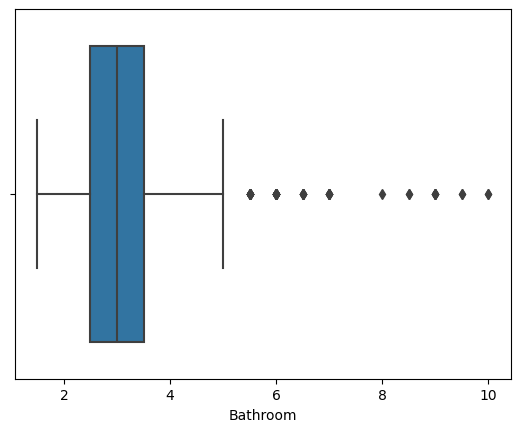

In [38]:
sns.boxplot(rentals, x='Bathroom')

<Axes: xlabel='Bedroom'>

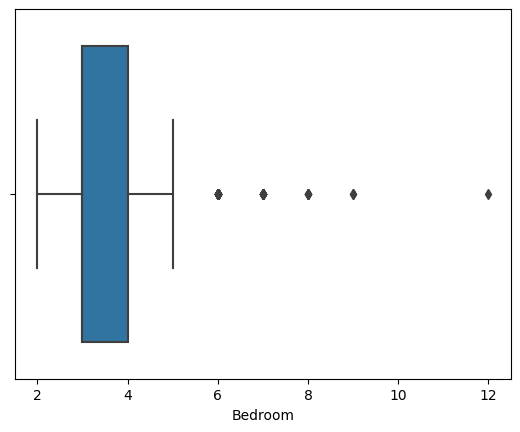

In [39]:
sns.boxplot(rentals, x='Bedroom')

Let's check the range of br, ba, price when grouping

In [40]:
grouped_bedroom = rentals.groupby('Bedroom').agg({'Price': ['min', 'max', 'mean']})
#Rename the mutltiindex columns and reset the index
grouped_bedroom.columns = ['price_min', 'price_max', 'price_mean']
grouped_bedroom.reset_index()
grouped_bedroom

,price_min,price_max,price_mean
Bedroom,,,
2,1200,10000,2889.155080
3,1050,20000,3430.822394
4,1000,16500,4180.311927
5,2800,18000,5842.486842
6,3800,15000,7778.928571
7,4500,40000,14169.230769
8,5095,38500,20779.000000
9,19800,19800,19800.000000
12,9150,9150,9150.000000


It looks like we have a big range of price by bedroom. In fact, it depends on the location. So, we should consider grouping different location.

In [43]:
# 2 Bedrooms
df_2br = rentals[rentals.Bedroom == 2]
df_2br.describe()



,Bedroom,Bathroom,Price
count,187.0,129.000000,187.000000
mean,2.0,2.174419,2889.155080
std,0.0,0.575038,1141.512754
min,2.0,1.500000,1200.000000
25%,2.0,2.000000,2227.500000
50%,2.0,2.000000,2700.000000
75%,2.0,2.500000,3100.000000
max,2.0,4.000000,10000.000000


/var/folders/ft/d6myr2t95bsgmc47wcg7bcwm0000gn/T/ipykernel_4228/808624850.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




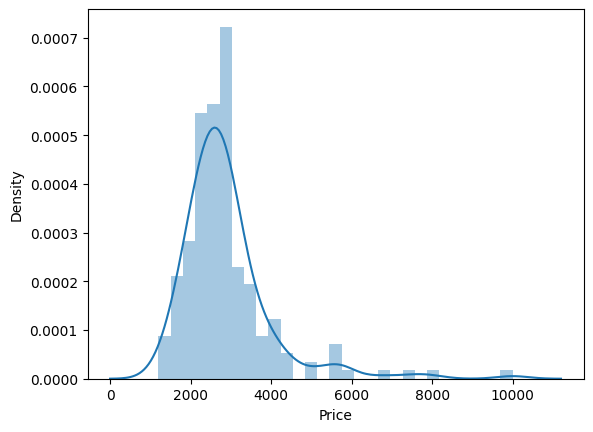

In [44]:
# distribution of 2br price

from matplotlib import figure
import matplotlib as plt
import seaborn as sns
%matplotlib inline

#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(df_2br['Price']);

In [48]:
df_3br = rentals[rentals.Bedroom == 3]
df_3br.describe()

,Bedroom,Bathroom,Price
count,518.0,498.000000,518.000000
mean,3.0,2.953815,3430.822394
std,0.0,0.839107,1491.786378
min,3.0,1.500000,1050.000000
25%,3.0,2.500000,2700.000000
50%,3.0,3.000000,3025.000000
75%,3.0,3.500000,3700.000000
max,3.0,6.000000,20000.000000


/var/folders/ft/d6myr2t95bsgmc47wcg7bcwm0000gn/T/ipykernel_4228/2412088932.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




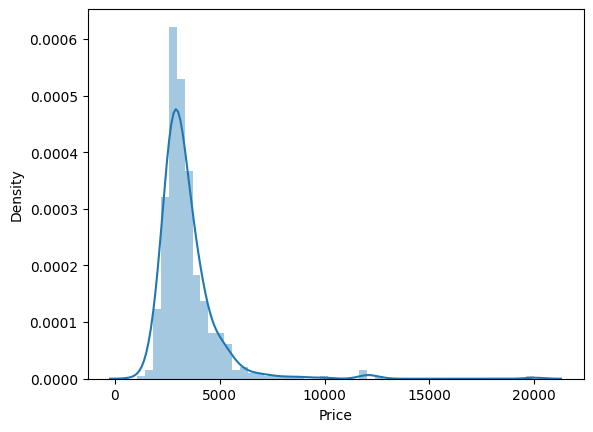

In [49]:
# distribution of 3br price

from matplotlib import figure
import matplotlib as plt
import seaborn as sns
%matplotlib inline

#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(df_3br['Price']);

In [51]:
df_4br = rentals[rentals.Bedroom == 4]
df_4br.describe()

,Bedroom,Bathroom,Price
count,327.0,326.000000,327.000000
mean,4.0,3.213190,4180.311927
std,0.0,0.805621,1713.794355
min,4.0,1.500000,1000.000000
25%,4.0,2.500000,3200.000000
50%,4.0,3.500000,3750.000000
75%,4.0,3.500000,4700.000000
max,4.0,7.000000,16500.000000


/var/folders/ft/d6myr2t95bsgmc47wcg7bcwm0000gn/T/ipykernel_4228/294721502.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Price', ylabel='Density'>

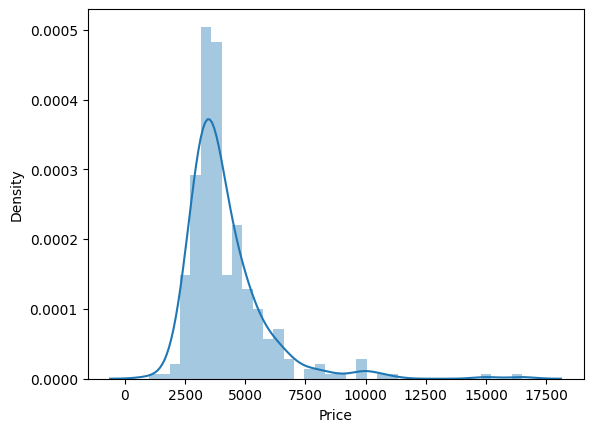

In [52]:
sns.distplot(df_4br['Price'])

Let's check the correlation of br, ba, location with price

In [53]:
px.scatter(rentals, x='Bedroom', y='Price')

It is hard to tell there is a correlation as different locations could have big difference in prices. Price could be different significantly depending on the location, number of br, ba, school ratings, walkable scores,  neighborhood crime rate, job center, house types, sqft, population density, proximity - amenitites: shopping, dining, cutural attractions, public transportation...   

It would be better and comprehensive if we could check all the factors in comparing the prices.  
- Where is the most expensive place to live? least expensive?  
- How much is the average rent for  -- br, --good school, --good walkable scores, --lowest crime rate neighborhood, --high proximity: public transportation, shopping, dining, attractions...

In [55]:
rentals.columns

Index(['Title', 'Address', 'Bedroom', 'Bathroom', 'Price', 'City', 'State',
       'Zipcode'],
      dtype='object')

In [62]:
rentals.head()

,Title,Address,Bedroom,Bathroom,Price,City,State,Zipcode
1,House,"5929 Merritt Place, Falls Church, VA 22041",5,3.0,4150,Falls Church,VA,22041
3,Townhouse,Unlisted Address,3,3.5,2775,None,None,None
4,House,"703 Morningside Ct, Herndon, VA 20170",5,2.0,3300,Herndon,VA,20170
5,Townhouse,"5455 New London Park Dr, Fairfax, VA 22032",3,4.0,2700,Fairfax,VA,22032
6,Townhouse,"14312 Beckett Glen Cir, Chantilly, VA 20151",3,5.0,4800,Chantilly,VA,20151


In [ ]:
# looking for a house in Arlington which the price is under $3000
pd.options.display.max_colwidth = 100
bestprice_arlington = df[(df['Price'] < 3000) & (df['Clean_location'] == 'Arlington VA')]
bestprice_arlington

,Posted,Location,Post Title,Bedrooms,Sqft,Distance,Price,Clean_location
78,2021-07-15,South Arlington,Furnished Lower Level of Arlington Townhouse- All Inclusive!,1.0,400.0,5.8,1425,Arlington VA
79,2021-07-17,"Arlington, VA",House for Rent in S. Arlington/Claremont,4.0,1600.0,5.8,2600,Arlington VA
80,2021-07-18,N Arlington Ballston Metro orange/silver line,SEPT 1 MOVE IN**0.8mi Walk to Ballston Metro**,1.0,100.0,5.9,850,Arlington VA
94,2021-07-17,Fairlington,Lovely Townhome in Fairlington Mews for Rent,2.0,922.0,6.4,2250,Arlington VA
97,2021-07-17,Arlington close-in to D.C.,"Short Term,Furnished 2 Bed, 1 bath, 2-story townhouse/duplex w/parking",2.0,1350.0,6.5,1987,Arlington VA
98,2021-07-16,Arlington close-in to D.C.,"Short Term,Furnished 2 Bed, 1 bath, 2-story townhouse/duplex w/parking",2.0,1350.0,6.5,1987,Arlington VA
99,2021-07-12,"Arlington, VA",1 bedroom 1 bathroom townhouse for rent,1.0,801.0,6.5,1650,Arlington VA
105,2021-07-12,"Arlington,","Sunny, two-story, 1BR 1.5 Bath Coach House",1.0,800.0,6.9,1550,Arlington VA
120,2021-07-18,Arlington/Clarendon/Pentagon_Crystal City northern virginia,ARLINGTON 3BR 2.5ba 3 Lvl TH,3.0,1600.0,7.8,2600,Arlington VA


# Visualization and Dashboards

### Checking correlations

In [71]:
rentals.head()

,Title,Address,Bedroom,Bathroom,Price,City,State,Zipcode
1,House,"5929 Merritt Place, Falls Church, VA 22041",5,3.0,4150,Falls Church,VA,22041
3,Townhouse,Unlisted Address,3,3.5,2775,None,None,None
4,House,"703 Morningside Ct, Herndon, VA 20170",5,2.0,3300,Herndon,VA,20170
5,Townhouse,"5455 New London Park Dr, Fairfax, VA 22032",3,4.0,2700,Fairfax,VA,22032
6,Townhouse,"14312 Beckett Glen Cir, Chantilly, VA 20151",3,5.0,4800,Chantilly,VA,20151


In [72]:
rentals[['Bedroom', 'Bathroom', 'Price']].corr()

,Bedroom,Bathroom,Price
Bedroom,1.000000,0.637605,0.558270
Bathroom,0.637605,1.000000,0.617735
Price,0.558270,0.617735,1.000000


## Location 

In [77]:
rentals.Zipcode.value_counts()

Zipcode
22101    62
22191    50
20002    46
22192    40
20171    38
         ..
22311     1
22304     1
20785     1
20818     1
20143     1
Name: count, Length: 109, dtype: int64

In [80]:
#group by location
rentals.State.value_counts()

State
VA    906
DC    275
MD     63
Name: count, dtype: int64

# Conclusion

It is quite challenging to webscrape in these days as many websites of big companies have all the smart bot detection system to block bots' crawling on their site. To prevent from being detected and then blocked from the sites, we should carefully draft or plan the codes first before starting to scrape data, and try to use headers, proxies, time delays as much as we could.

Craigslist's data is very messy with different formats of locations, bedrooms, bathrooms and prices. It takes a lot of time to clean up the data before data analysis. There is somewhat a correlation between Bedrooms and Price, 0.605. There are mostly 3-4 bedroom houses/townhomes for rent in the market in the Northern Virginia and most of the rentals available are from DC and Arlington VA. Average rental costs for 2, 3, and 4 bedrooms are 2539, 2759, and 3720 per month respectively in general. Specifically, in Arlington average rental costs for 3 and 4 bedroom houses/townhomes are 3382 and 4061 respectively. 

From data, we could see prices in different locations vary significantly. Especially, prices in Arlington are higher compared to ones in Woodbridge. It makes senses since Arlington is close to Washington DC where most jobs in the area are from DC. Workers who live in Arlington could avoid getting hit by traffic and save time of commuting than those who live in Woodbridge, so it causes the prices higher. 
